# Multidimensional differential equations

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy import integrate

## Ball in a bowl: 2 uncoupled harmonic oscillators

We solve the following differential equation:
$$ m\ddot{\vec{r}} = -\xi\dot{\vec{r}}-\nabla U(\vec{r}) + \vec{F}_\mathrm{ext}.$$

For the profile of the bowl we consider a quadratic function
$$ U(\vec{r}) = U_0 r^2 = U_0 (x^2 + y^2).$$

The gradient is 
$$ \nabla U(\vec{r}) = 2U_0 \begin{pmatrix}x\\y\end{pmatrix} = 2U_0\vec{r}. $$

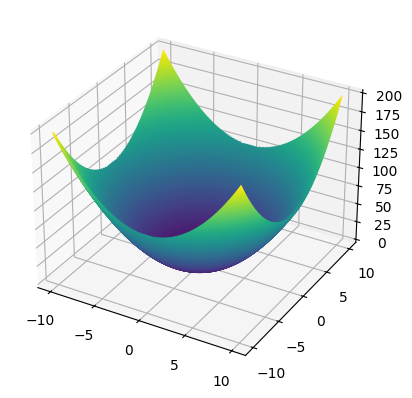

In [2]:
x, y = np.meshgrid(np.linspace(-10,10,201),np.linspace(-10,10,201))
z = x**2 + y**2

plotproj = plt.axes(projection='3d')
plotproj.contour3D(x,y,z,200)

### Revisit 1d harmonic oscillator

In [3]:
# Pendulum geometry
length = 2
c = 9.81/length

# Damping
b = 0.1
d = -1.0
omega = 1.0

def f_ODE(t,theta):
    return theta[1], -b*theta[1] - c*np.sin(theta[0]) - d*np.sin(omega*t)

theta00 = 2.0
theta10 = 0.0

solution_RK45 = integrate.solve_ivp(f_ODE, [0,100], [theta00, theta10], method = 'RK45', t_eval = np.linspace(0,100,201))

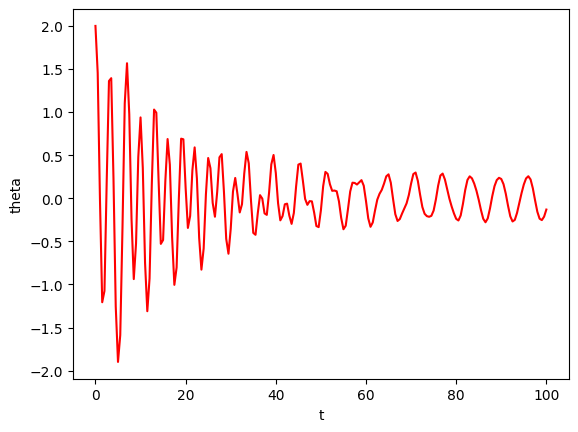

In [4]:
plt.xlabel('t')
plt.ylabel('theta')

plt.plot(solution_RK45.t, solution_RK45.y[0], 'red')

**The normal harmonic oscillator is (mathematically) already a two-dimensional example:**

Second-order differential equation: $ y''(t) = f\left(t,y(t),y'(t)\right)$

Introduce: $ z_0(t) = y(t)$ and $ z_1(t) = y'(t)$

$$ \begin{pmatrix}z_0'(t)\\z_1'(t)\end{pmatrix}=\begin{pmatrix}z_1(t)\\f\left(t,z_0(t),z_1(t)\right)\end{pmatrix}$$

Therefore, we can describe the second-order differential equation by a set of two first-order differential equations. We can solve both with our Euler method

$$ z_0^{(n+1)} = z_0^{(n)} + z_1^{(n)} h $$

$$ z_1^{(n+1)} = z_1^{(n)} + f\left(t,z_0^{(n)},z_1^{(n)}\right) h $$

Or, going back to our initial nomenclature:

$$ y_{n+1} = y_{n} + y'_{n} h $$

$$ y'_{n+1} = y'_{n} + f\left(t,y_{n},y'_{n}\right) h $$

### Ball in a bowl

**Now we have 2 harmonic oscillators. Therefore, mathematically speaking, we have a four-dimensional system**

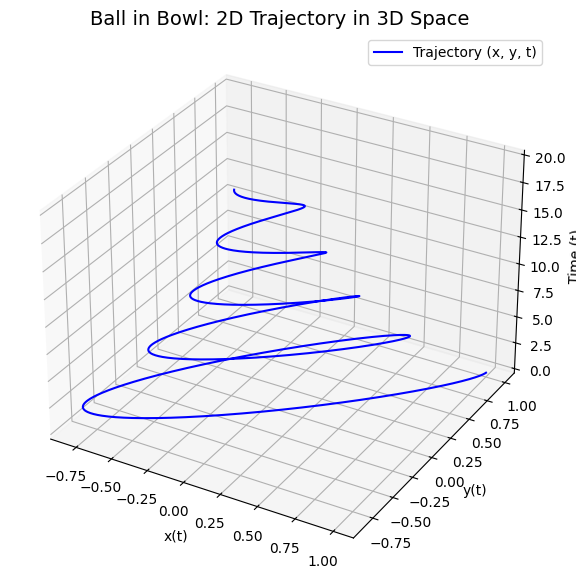

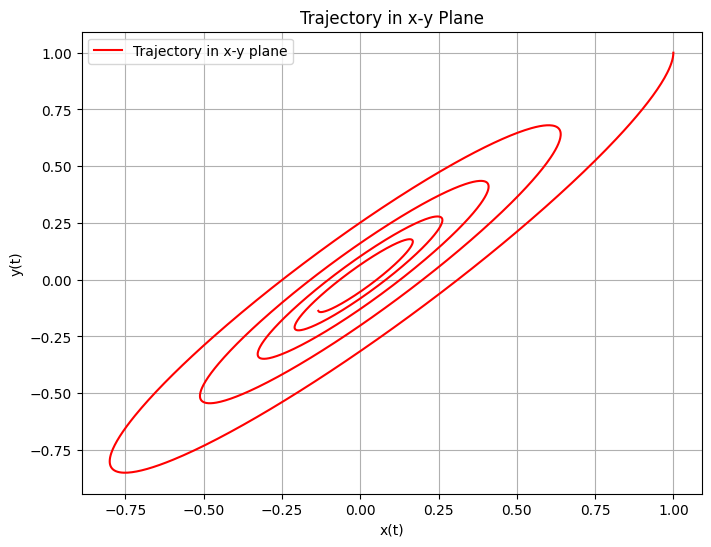

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define the system of equations in 2D
def ball_in_bowl_2D(t, y, m, xi, U0):
    """
    Governs the 2D motion of the ball in the bowl.
    Parameters:
    t: time
    y: state vector [x, vx, y, vy] where vx = dx/dt and vy = dy/dt
    m: mass of the ball
    xi: damping coefficient
    U0: stiffness coefficient for potential
    Returns:
    [vx, ax, vy, ay]
    """
    x, vx, y, vy = y
    ax = - (xi / m) * vx - (2 * U0 / m) * x
    ay = - (xi / m) * vy - (2 * U0 / m) * y
    return [vx, ax, vy, ay]

# Solve and plot results
def solve_and_plot_3D(m, xi, U0, y0, t_span, dt=0.01):
    """
    Solves the 2D ODE using scipy's RK45 and plots the resulting 3D trajectory.
    Parameters:
    m, xi, U0: system parameters
    y0: initial conditions [x(0), vx(0), y(0), vy(0)]
    t_span: time span (start, end)
    dt: time step
    """
    # Solve using scipy's RK45
    sol = solve_ivp(
        ball_in_bowl_2D, t_span, y0, method="RK45", t_eval=np.arange(t_span[0], t_span[1], dt), args=(m, xi, U0)
    )

    # Extract the solution
    x, y = sol.y[0], sol.y[2]

    # Plot the 3D trajectory
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(x, y, sol.t, label="Trajectory (x, y, t)", color="blue")
    ax.set_title("Ball in Bowl: 2D Trajectory in 3D Space", fontsize=14)
    ax.set_xlabel("x(t)")
    ax.set_ylabel("y(t)")
    ax.set_zlabel("Time (t)")
    ax.legend()
    plt.show()

    # 2D Projection: x-y plane
    plt.figure(figsize=(8, 6))
    plt.plot(x, y, label="Trajectory in x-y plane", color="red")
    plt.title("Trajectory in x-y Plane")
    plt.xlabel("x(t)")
    plt.ylabel("y(t)")
    plt.grid()
    plt.legend()
    plt.show()

# Parameters
m = 1.0          # Mass of the ball
xi = 0.2         # Damping coefficient
U0 = 1.0         # Stiffness coefficient
y0 = [1.0, 0.0, 1.0, -0.5]  # Initial conditions: [x(0), vx(0), y(0), vy(0)]
t_span = (0, 20)  # Time span
dt = 0.01         # Time step

# Solve and plot
solve_and_plot_3D(m, xi, U0, y0, t_span, dt)


### Linear trajectory

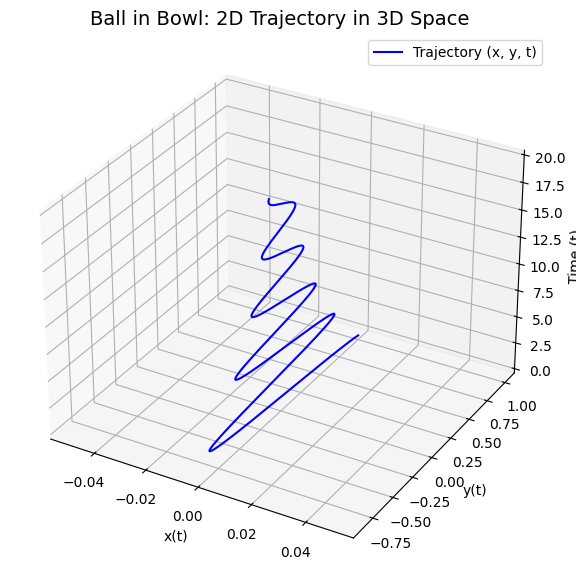

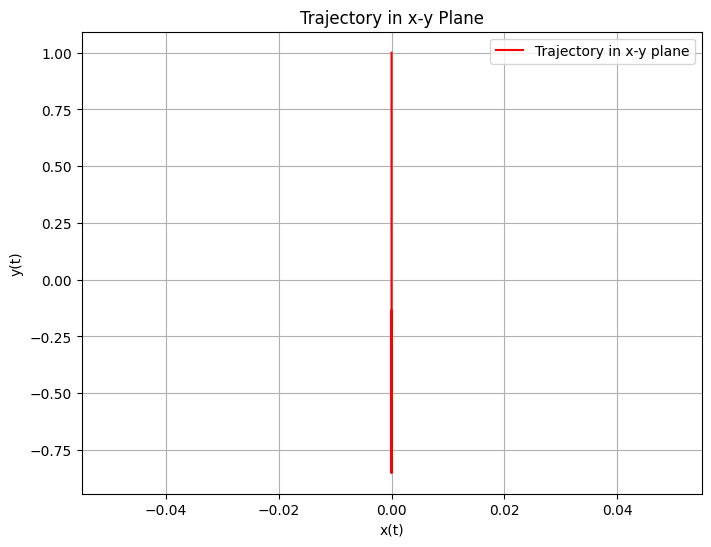

In [8]:
##Linear trajectories occur when motion in either x or y direction is zero at all times.
# Parameters
m = 1.0          # Mass of the ball
xi = 0.2         # Damping coefficient
U0 = 1.0         # Stiffness coefficient
y0 = [0.0, 0.0, 1.0, -0.5]  # Initial conditions: [x(0), vx(0), y(0), vy(0)]
t_span = (0, 20)  # Time span
dt = 0.01         # Time step

# Solve and plot
solve_and_plot_3D(m, xi, U0, y0, t_span, dt)


### Elliptical trajectory

1. If the initial conditions involve motion in both x and y, the trajectory is elliptical.

### External force

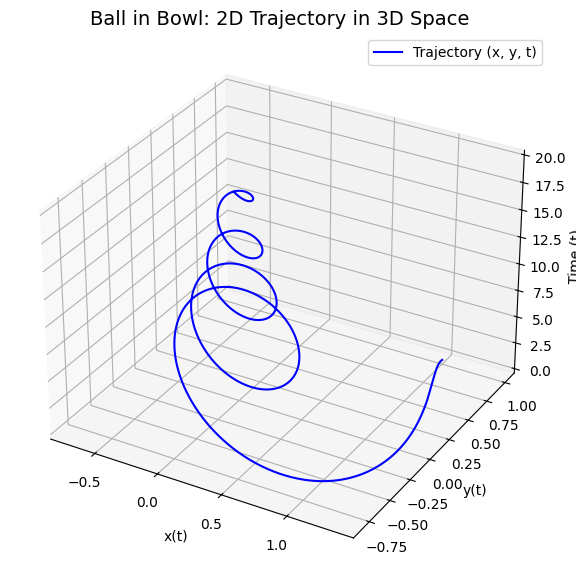

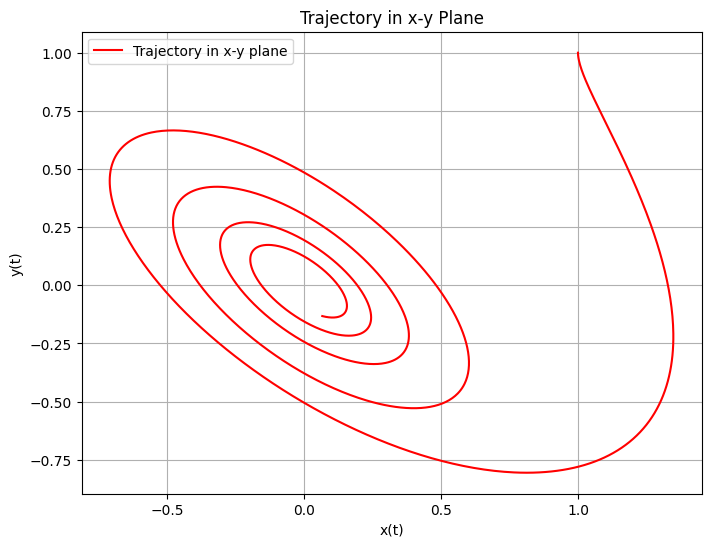

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define the system of equations in 2D
def ball_in_bowl_2D(t, y, m, xi, U0):
    """
    Governs the 2D motion of the ball in the bowl.
    Parameters:
    t: time
    y: state vector [x, vx, y, vy] where vx = dx/dt and vy = dy/dt
    m: mass of the ball
    xi: damping coefficient
    U0: stiffness coefficient for potential
    Returns:
    [vx, ax, vy, ay]
    """
    omega = 0.04
    x, vx, y, vy = y
    ax = - (xi / m) * vx - (2 * U0 / m) * x + 4*np.cos(omega*t)*np.exp(-t)  ## Adding external force
    ay = - (xi / m) * vy - (2 * U0 / m) * y + 4*np.sin(omega*t)*np.exp(-t)
    return [vx, ax, vy, ay]

# Solve and plot results
def solve_and_plot_3D(m, xi, U0, y0, t_span, dt=0.01):
    """
    Solves the 2D ODE using scipy's RK45 and plots the resulting 3D trajectory.
    Parameters:
    m, xi, U0: system parameters
    y0: initial conditions [x(0), vx(0), y(0), vy(0)]
    t_span: time span (start, end)
    dt: time step
    """
    # Solve using scipy's RK45
    sol = solve_ivp(
        ball_in_bowl_2D, t_span, y0, method="RK45", t_eval=np.arange(t_span[0], t_span[1], dt), args=(m, xi, U0)
    )

    # Extract the solution
    x, y = sol.y[0], sol.y[2]

    # Plot the 3D trajectory
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(x, y, sol.t, label="Trajectory (x, y, t)", color="blue")
    ax.set_title("Ball in Bowl: 2D Trajectory in 3D Space", fontsize=14)
    ax.set_xlabel("x(t)")
    ax.set_ylabel("y(t)")
    ax.set_zlabel("Time (t)")
    ax.legend()
    plt.show()

    # 2D Projection: x-y plane
    plt.figure(figsize=(8, 6))
    plt.plot(x, y, label="Trajectory in x-y plane", color="red")
    plt.title("Trajectory in x-y Plane")
    plt.xlabel("x(t)")
    plt.ylabel("y(t)")
    plt.grid()
    plt.legend()
    plt.show()

# Parameters
m = 1.0          # Mass of the ball
xi = 0.2         # Damping coefficient
U0 = 1.0         # Stiffness coefficient
y0 = [1.0, 0.0, 1.0, -0.5]  # Initial conditions: [x(0), vx(0), y(0), vy(0)]
t_span = (0, 20)  # Time span
dt = 0.01         # Time step

# Solve and plot
solve_and_plot_3D(m, xi, U0, y0, t_span, dt)
